In [33]:
# Importing Libraries
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import joblib
import warnings
warnings.filterwarnings('ignore')

# Natural Language Processing Libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, SnowballStemmer
from collections import Counter
nltk.download('punkt')
nltk.download('stopwords')

# TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Embedding, GRU, LSTM, Bidirectional, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Scikit-Learn Libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Visualization Libraries
import plotly.express as px


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hassa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hassa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
df_url= pd.read_csv('url_dataset.csv')

In [35]:
df_url.head()

,url,type
0,https://www.google.com,legitimate
1,https://www.youtube.com,legitimate
2,https://www.facebook.com,legitimate
3,https://www.baidu.com,legitimate
4,https://www.wikipedia.org,legitimate


In [36]:
df_url.columns

Index(['url', 'type'], dtype='object')

In [37]:
print(f'The Shape Of Data Is : {df_url.shape}')

The Shape Of Data Is : (450176, 2)


In [38]:
# checking the duplicates
df_url.duplicated().sum()

0

In [39]:
# Convert all URLs to lowercase
df_url['url'] = df_url['url'].str.lower()

In [40]:
# Remove protocols (http://, https://)
df_url['url'] = df_url['url'].str.replace(r'^https?://', '', regex=True)

In [41]:
# Extract domain name
df_url['domain'] = df_url['url'].str.extract(r'^([^/]+)')

In [42]:
# Tokenize URLs by splitting on non-alphanumeric characters
df_url['tokens'] = df_url['url'].str.split(r'\W+')

In [43]:
# Calculate URL length
df_url['length'] = df_url['url'].str.len()

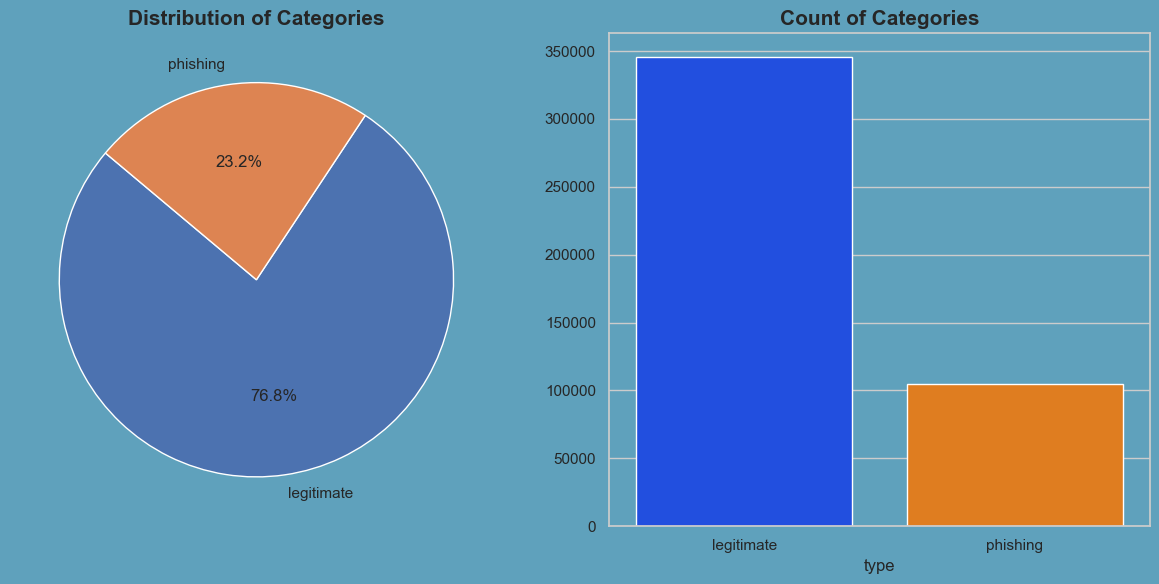

In [44]:
# Value count of 'label'
count = df_url['type'].value_counts()

# Set the background color and theme
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color, 'figure.facecolor': background_color})

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor=background_color)

# Plot pie chart on the first subplot
palette = sns.color_palette("bright", len(count))
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories', fontsize=15, fontweight='bold')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette=palette)
axs[1].set_title('Count of Categories', fontsize=15, fontweight='bold')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [45]:
df_url.head()

,url,type,domain,tokens,length
0,www.google.com,legitimate,www.google.com,"[www, google, com]",14
1,www.youtube.com,legitimate,www.youtube.com,"[www, youtube, com]",15
2,www.facebook.com,legitimate,www.facebook.com,"[www, facebook, com]",16
3,www.baidu.com,legitimate,www.baidu.com,"[www, baidu, com]",13
4,www.wikipedia.org,legitimate,www.wikipedia.org,"[www, wikipedia, org]",17


In [46]:
#label encoding for the Email Type Column
le1 = LabelEncoder()
df_url["type"] = le1.fit_transform(df_url["type"])

In [47]:
df_url.head()

,url,type,domain,tokens,length
0,www.google.com,0,www.google.com,"[www, google, com]",14
1,www.youtube.com,0,www.youtube.com,"[www, youtube, com]",15
2,www.facebook.com,0,www.facebook.com,"[www, facebook, com]",16
3,www.baidu.com,0,www.baidu.com,"[www, baidu, com]",13
4,www.wikipedia.org,0,www.wikipedia.org,"[www, wikipedia, org]",17


In [48]:
# Convert tokens to strings for tokenizer
df_url['tokens_str'] = df_url['tokens'].apply(lambda x: ' '.join(x))

In [49]:
df_url.head()

,url,type,domain,tokens,length,tokens_str
0,www.google.com,0,www.google.com,"[www, google, com]",14,www google com
1,www.youtube.com,0,www.youtube.com,"[www, youtube, com]",15,www youtube com
2,www.facebook.com,0,www.facebook.com,"[www, facebook, com]",16,www facebook com
3,www.baidu.com,0,www.baidu.com,"[www, baidu, com]",13,www baidu com
4,www.wikipedia.org,0,www.wikipedia.org,"[www, wikipedia, org]",17,www wikipedia org


In [50]:
# TF-IDF Vectorization (with reduced max features)
tfidf = TfidfVectorizer(max_features=1000)  # Reduce the number of features to 1000
X = tfidf.fit_transform(df_url['tokens_str'])

In [51]:
Y = np.array(df_url['type']) # convert the label into numpy array

In [52]:
# Split data into training and testing sets
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X, Y, test_size=0.2, random_state=42)

In [53]:
# Logistic Regression Model
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_TRAIN, Y_TRAIN)


LogisticRegression(max_iter=1000)

In [54]:
# Predictions
Y_PRED = model1.predict(X_TEST)

In [55]:
# Evaluate the model
print("Accuracy:", accuracy_score(Y_TEST, Y_PRED))

Accuracy: 0.9775867430805456


<Figure size 400x300 with 0 Axes>

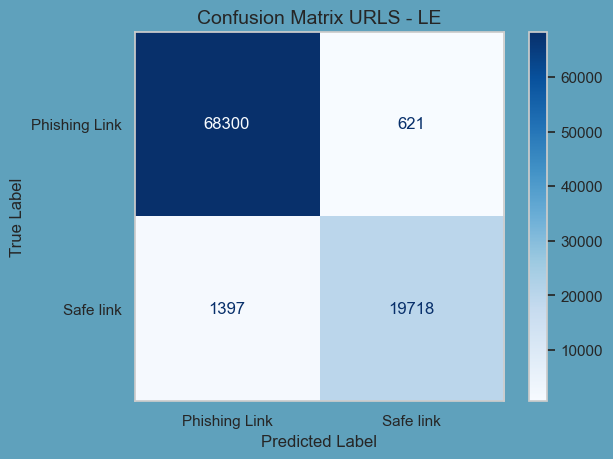

In [56]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(Y_TEST, Y_PRED)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Phishing Link', 'Safe link'])

# Plotting the confusion matrix
plt.figure(figsize=(4, 3))
disp.plot(cmap='Blues', values_format='d') 
plt.title("Confusion Matrix URLS - LE", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.grid(False)
plt.show()

In [58]:
# Save the trained model to a pickle file
with open("URL_LR.pkl", "wb") as f:
    pickle.dump((tfidf, model1), f)

print("Model saved to URL_LR.pkl")

Model saved to URL_LR.pkl
